In [1]:
import sys
import os
from IPython.display import Image
import pandas as pd

# Replace with the actual path to your pyxations package
package_path = "../pyxations"
sys.path.append(package_path)
import pyxations as pyx
from pyxations import compute_derivatives_for_dataset
import os
from pyxations.export import FEATHER_EXPORT, HDF5_EXPORT

In [12]:
#!pip install seaborn pyarrow
!pip install plotly nbformat

# Dataset to BIDS

# Compute derivatives

In [2]:
current_folder = os.getcwd()
current_folder = os.path.dirname(current_folder)
bids_dataset_folder = os.path.join(current_folder,"example_dataset")
msg_keywords = ["begin","end","press"]
start_msgs = {'search':['beginning_of_stimuli']}
end_msgs = {'search':['end_of_stimuli']}

In [4]:

detection_algorithm = 'eyelink'
pyx.compute_derivatives_for_dataset(
    # required
    bids_dataset_folder=bids_dataset_folder, 
    dataset_format='eyelink',
    # optional
    detection_algorithm='eyelink',
    msg_keywords=msg_keywords, 
    start_msgs=start_msgs, 
    end_msgs=end_msgs, 
    overwrite=True)

PosixPath('/home/placiana/workspace/pyxations/example_dataset_derivatives')

In [ ]:
pyx.compute_derivatives_for_dataset(
    # required
    bids_dataset_folder=bids_dataset_folder, 
    dataset_format='eyelink', 
    # optional
    detection_algorithm='remodnav',
    msg_keywords=msg_keywords, 
    start_msgs=start_msgs, 
    end_msgs=end_msgs, 
    overwrite=True,
    savgol_length= 0.195,
    max_pso_dur=1
)

## Saccades

In [22]:
df_remodnav = pd.read_feather(os.path.join(current_folder,"example_dataset_derivatives/sub-0001/ses-second/remodnav_events/sacc.feather"))

In [23]:
df_eyelink = pd.read_feather(os.path.join(current_folder,'example_dataset_derivatives/sub-0001/ses-second/eyelink_events/sacc.feather'))

In [8]:
import matplotlib.pyplot as plt

def plot_comparison(df_eyelink, df_remodnav, trial:int=None):
    if trial:
        df_eyelink = df_eyelink[df_eyelink['trial_number']== trial]
        df_remodnav = df_remodnav[df_remodnav['trial_number']== trial]
    
    # Plot settings
    fig, ax = plt.subplots(figsize=(10, 2))

    # Plot segments for df1
    for start, end in zip(df_eyelink["tStart"], df_eyelink["tEnd"]):
        #ax.plot([start, end], [1, 1], color="blue", marker="o", label="Series 1" if start == df_eyelink["tStart"][0] else "")
        ax.plot([start, end], [1, 1], color="blue", marker="o", label="Eyelink" )


        # Plot segments for df2
    for start, end in zip(df_remodnav["tStart"], df_remodnav["tEnd"]):
        #ax.plot([start, end], [2, 2], color="red", marker="o", label="Series 2" if start == df_remodnav["tStart"][0] else "")
        ax.plot([start, end], [2, 2], color="red", marker="x", label="Remodnav")

    # Customize the y-axis to label the series
    ax.set_yticks([1, 2])
    ax.set_yticklabels(["Eyelink", "Remodnav"])

    # Add labels and title
    ax.set_xlabel("Time")
    ax.set_ylabel("Series")
    title = "Segment Plot for detection algorithms"
    if trial:
        title += f' Trial: {trial}'
    ax.set_title(title)

    # Show the legend
    #ax.legend()

    # Show the plot
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [18]:
def plot_screen(df, another_df, trial_no=None):
    if trial_no:
        df = df[df['trial_number']== trial_no]
        another_df = another_df[another_df['trial_number']== trial_no]

        # Create a plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot each segment
    for _, row in df.iterrows():
        ax.plot([row["xStart"], row["xEnd"]], [row["yStart"], row["yEnd"]], marker="o", color="red", label=f"Segment A: {_+1}")

    # Plot each segment
    for _, row in another_df.iterrows():
        ax.plot([row["xStart"], row["xEnd"]], [row["yStart"], row["yEnd"]], marker="x", color="blue", label=f"Segment B: {_+1}")
        
        
    # Add labels and title
    ax.set_title("Segments Plot")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()  # Show legend for each segment

    # Show grid
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()

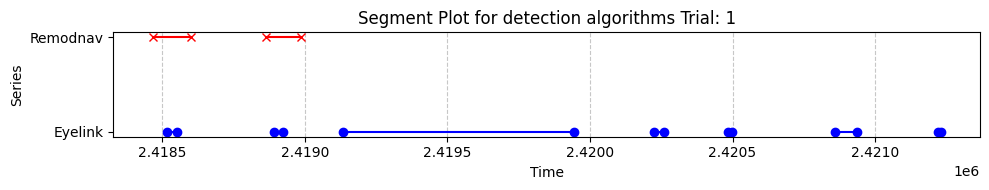

In [59]:
plot_comparison(df_eyelink, df_remodnav, 1)

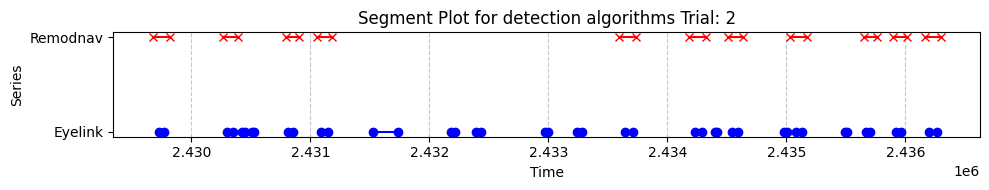

In [60]:
plot_comparison(df_eyelink, df_remodnav, 2)

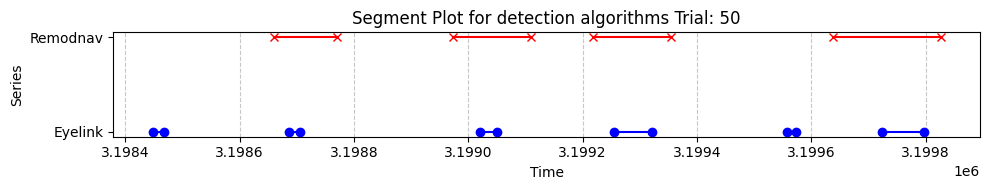

In [61]:
plot_comparison(df_eyelink, df_remodnav, 50)

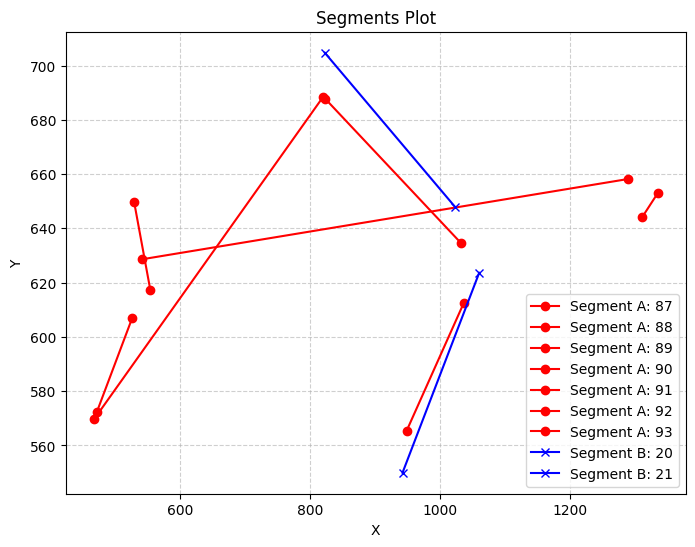

In [25]:
plot_screen(df_eyelink, df_remodnav, 1)

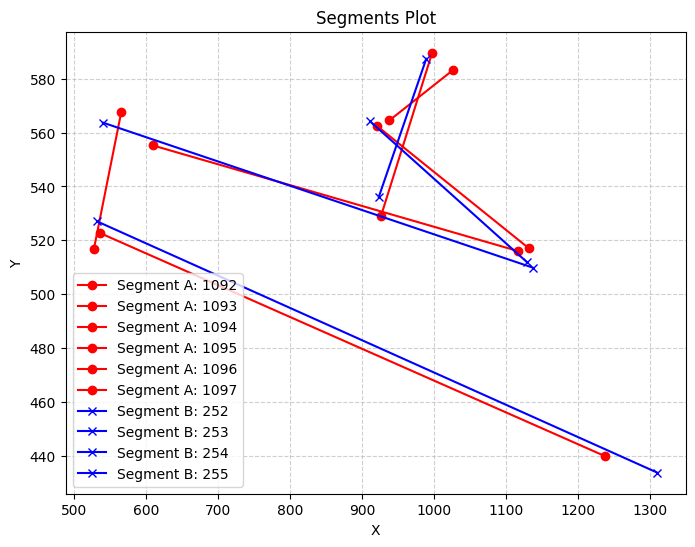

In [26]:
plot_screen(df_eyelink, df_remodnav, 50)

# Fixations

In [6]:
df_fix_remodnav = pd.read_feather(os.path.join(current_folder,"example_dataset_derivatives/sub-0001/ses-second/remodnav_events/fix.feather"))
df_fix_eyelink = pd.read_feather(os.path.join(current_folder, 'example_dataset_derivatives/sub-0001/ses-second/eyelink_events/fix.feather'))

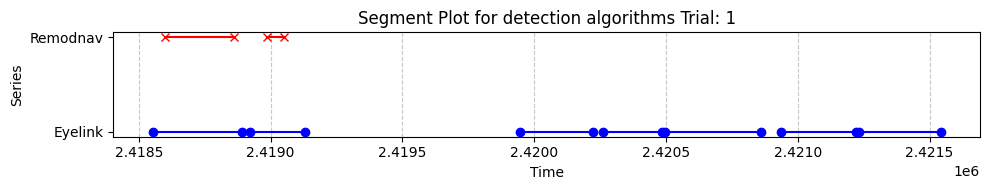

In [70]:
plot_comparison(df_fix_eyelink, df_fix_remodnav, 1)

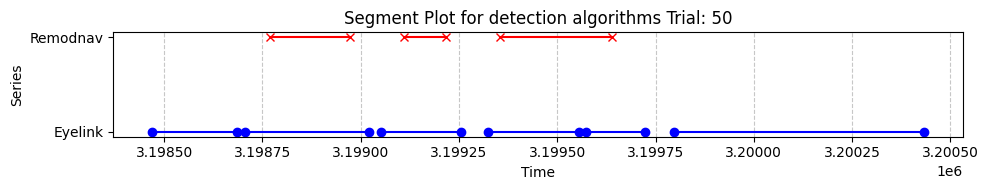

In [75]:
plot_comparison(df_fix_eyelink, df_fix_remodnav, 50)

In [76]:
df_fix_remodnav[df_fix_remodnav['trial_number']==1]

,index,tStart,tEnd,xStart,yStart,xEnd,yEnd,ampDeg,vPeak,med_vel,...,yAvg,pupilAvg,Calib_index,Eyes_recorded,Rate_recorded,eye,bad,phase,trial_number,trial_label
13,13,2418599.0,2418862.0,1060.580345,623.748949,1024.953215,647.462284,0.783337,27.335795,3.874188,...,630.777099,672.927481,1,LR,1000.0,R,False,search,1,
14,14,2418985.0,2419050.0,822.758536,704.794868,829.604481,712.427266,0.187662,12.362101,5.516520,...,706.684375,678.656250,1,LR,1000.0,R,False,search,1,


# Python objects

In [74]:
experiment = pyx.Experiment(os.path.join(current_folder, 'example_dataset'))
experiment.load_data('remodnav')

a_subject = experiment.subjects['0001']
session = a_subject.get_session('second')
a_trial = session.get_trial(1)
a_trial.fixations()

,index,tStart,tEnd,xStart,yStart,xEnd,yEnd,ampDeg,vPeak,med_vel,...,yAvg,pupilAvg,Calib_index,Eyes_recorded,Rate_recorded,eye,bad,phase,trial_number,trial_label
0,13,423.0,686.0,1060.580345,623.748949,1024.953215,647.462284,0.783337,27.335795,3.874188,...,630.777099,672.927481,1,LR,1000.0,R,False,search,1,
1,14,809.0,874.0,822.758536,704.794868,829.604481,712.427266,0.187662,12.362101,5.516520,...,706.684375,678.656250,1,LR,1000.0,R,False,search,1,
